## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from datetime import datetime
from matplotlib.pyplot import hist
import seaborn as sns

# Importing the dataset

In [2]:
data= pd.read_csv('marketing_campaign.csv')

In [3]:
data.head(15)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/13,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/14,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09/09/13,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13/11/12,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08/05/13,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06/06/13,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13/03/14,68,28,...,20,1,0,0,0,0,0,3,11,0


In [4]:
data.shape

(2240, 29)

# Looking for missing values:

In [5]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
missing_indices= np.where(data['Income'].isnull())[0]

In [7]:
missing_indices.shape

(24,)

In [8]:
print(missing_indices)

[  10   27   43   48   58   71   90   91   92  128  133  312  319 1379
 1382 1383 1386 2059 2061 2078 2079 2081 2084 2228]


# Handling missing values

In [9]:
data['Income'].median()

51381.5

In [10]:
data['Income'].fillna(data['Income'].median(),inplace=True)

In [11]:
data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

# Data types

In [12]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

# Dealing with the Income column outlier

In [31]:
print(data['Income'].sort_values(ascending=False))

617     162397.0
687     160803.0
1300    157733.0
164     157243.0
1653    157146.0
          ...   
1975      4428.0
1846      4023.0
1524      3502.0
21        2447.0
1245      1730.0
Name: Income, Length: 2239, dtype: float64


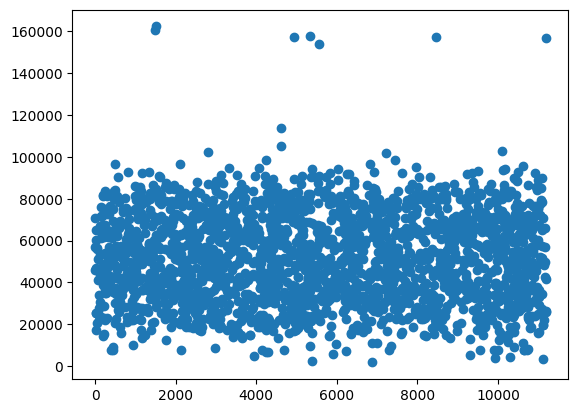

In [32]:
plt.scatter(data['ID'],data['Income'])

In [25]:
data[data['Income'] == 666666].index

Int64Index([2233], dtype='int64')

In [26]:
data['Income'][2233]

666666.0

In [29]:
data.drop(2233,inplace=True)

In [30]:
data.shape

(2239, 29)

# Value counts

In [33]:
data['Education'].value_counts(),data['Marital_Status'].value_counts()

(Graduation    1126
 PhD            486
 Master         370
 2n Cycle       203
 Basic           54
 Name: Education, dtype: int64,
 Married     864
 Together    579
 Single      480
 Divorced    232
 Widow        77
 Alone         3
 Absurd        2
 YOLO          2
 Name: Marital_Status, dtype: int64)

# Handling Dt_Customer column to get 'Customer Age':

In [34]:
data['Dt_Customer']= pd.to_datetime(data['Dt_Customer'])

In [35]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [36]:
data['Dt_Customer'].max()

Timestamp('2014-12-06 00:00:00')

In [37]:
datetime(2015,1,1).year-data['Dt_Customer'][20].year

3

In [38]:
ind=0
for i in data['Dt_Customer']:
    i= 2015-i.year
    data['Dt_Customer'][ind]=i
    ind= ind+1

/var/folders/4x/mj_snvwn509g421vtglhjd_h0000gn/T/ipykernel_7542/3956956160.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Dt_Customer'][ind]=i
/var/folders/4x/mj_snvwn509g421vtglhjd_h0000gn/T/ipykernel_7542/3956956160.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Dt_Customer'][ind]=i
/var/folders/4x/mj_snvwn509g421vtglhjd_h0000gn/T/ipykernel_7542/3956956160.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data

In [39]:
data.rename(columns={'Dt_Customer':'Customer reg Age'},inplace=True)

In [40]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Customer reg Age,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,3,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,1,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,1,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,1,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,1,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,1,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,1,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,3,8,428,...,3,0,0,0,0,0,0,3,11,0


In [41]:
data['Children']=data['Kidhome']+data['Teenhome']
data.drop(columns={'Kidhome','Teenhome'},inplace=True)

In [42]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Customer reg Age,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children
0,5524,1957,Graduation,Single,58138.0,3,58,635,88,546,...,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,46344.0,1,38,11,1,6,...,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Graduation,Together,71613.0,2,26,426,49,127,...,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Together,26646.0,1,26,11,4,20,...,0,0,0,0,0,0,3,11,0,1
4,5324,1981,PhD,Married,58293.0,1,94,173,43,118,...,0,0,0,0,0,0,3,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,1,46,709,43,182,...,0,0,0,0,0,0,3,11,0,1
2236,4001,1946,PhD,Together,64014.0,1,56,406,0,30,...,0,0,0,1,0,0,3,11,0,3
2237,7270,1981,Graduation,Divorced,56981.0,1,91,908,48,217,...,0,1,0,0,0,0,3,11,0,0
2238,8235,1956,Master,Together,69245.0,3,8,428,30,214,...,0,0,0,0,0,0,3,11,0,1


In [43]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Customer reg Age', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Children'],
      dtype='object')

In [44]:
data['Total expenditure']=data['MntFishProducts']+data['MntFruits']+data['MntGoldProds']+data['MntMeatProducts']+data['MntSweetProducts']+data['MntWines']

In [45]:
data.drop(columns={'MntFishProducts','MntFruits','MntGoldProds','MntMeatProducts','MntSweetProducts','MntWines'},inplace=True)

In [46]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Customer reg Age,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,Total expenditure
0,5524,1957,Graduation,Single,58138.0,3,58,3,8,10,...,0,0,0,0,0,3,11,1,0,1617
1,2174,1954,Graduation,Single,46344.0,1,38,2,1,1,...,0,0,0,0,0,3,11,0,2,27
2,4141,1965,Graduation,Together,71613.0,2,26,1,8,2,...,0,0,0,0,0,3,11,0,0,776
3,6182,1984,Graduation,Together,26646.0,1,26,2,2,0,...,0,0,0,0,0,3,11,0,1,53
4,5324,1981,PhD,Married,58293.0,1,94,5,5,3,...,0,0,0,0,0,3,11,0,1,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,1,46,2,9,3,...,0,0,0,0,0,3,11,0,1,1341
2236,4001,1946,PhD,Together,64014.0,1,56,7,8,2,...,0,0,1,0,0,3,11,0,3,444
2237,7270,1981,Graduation,Divorced,56981.0,1,91,1,2,3,...,1,0,0,0,0,3,11,0,0,1241
2238,8235,1956,Master,Together,69245.0,3,8,2,6,5,...,0,0,0,0,0,3,11,0,1,843


In [47]:
ind=0
for i in data['Year_Birth']:
    i= 2015-i
    data['Year_Birth'][ind]=i
    ind= ind+1

/var/folders/4x/mj_snvwn509g421vtglhjd_h0000gn/T/ipykernel_7542/4032977117.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year_Birth'][ind]=i
/var/folders/4x/mj_snvwn509g421vtglhjd_h0000gn/T/ipykernel_7542/4032977117.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year_Birth'][ind]=i


In [48]:
data.rename(columns={'Year_Birth':'Age'},inplace=True)

In [49]:
data

,ID,Age,Education,Marital_Status,Income,Customer reg Age,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,Total expenditure
0,5524,58,Graduation,Single,58138.0,3,58,3,8,10,...,0,0,0,0,0,3,11,1,0,1617
1,2174,61,Graduation,Single,46344.0,1,38,2,1,1,...,0,0,0,0,0,3,11,0,2,27
2,4141,50,Graduation,Together,71613.0,2,26,1,8,2,...,0,0,0,0,0,3,11,0,0,776
3,6182,31,Graduation,Together,26646.0,1,26,2,2,0,...,0,0,0,0,0,3,11,0,1,53
4,5324,34,PhD,Married,58293.0,1,94,5,5,3,...,0,0,0,0,0,3,11,0,1,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,69,Graduation,Married,61223.0,1,46,2,9,3,...,0,0,0,0,0,3,11,0,1,1341
2236,4001,34,PhD,Together,64014.0,1,56,7,8,2,...,0,0,1,0,0,3,11,0,3,444
2237,7270,59,Graduation,Divorced,56981.0,1,91,1,2,3,...,1,0,0,0,0,3,11,0,0,1241
2238,8235,61,Master,Together,69245.0,3,8,2,6,5,...,0,0,0,0,0,3,11,0,1,843


In [50]:
data['Marital_Status'].value_counts()

Married     864
Together    579
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [51]:
replace_map= {'Divorced':'Single','Widow':'Single','Alone':'Single','Absurd':'Single','YOLO':'Single','Married':'Married/Relationship','Together':'Married/Relationship','Single':'Single'}
data['Marital_Status']= data['Marital_Status'].map(replace_map)
data

,ID,Age,Education,Marital_Status,Income,Customer reg Age,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,Total expenditure
0,5524,58,Graduation,Single,58138.0,3,58,3,8,10,...,0,0,0,0,0,3,11,1,0,1617
1,2174,61,Graduation,Single,46344.0,1,38,2,1,1,...,0,0,0,0,0,3,11,0,2,27
2,4141,50,Graduation,Married/Relationship,71613.0,2,26,1,8,2,...,0,0,0,0,0,3,11,0,0,776
3,6182,31,Graduation,Married/Relationship,26646.0,1,26,2,2,0,...,0,0,0,0,0,3,11,0,1,53
4,5324,34,PhD,Married/Relationship,58293.0,1,94,5,5,3,...,0,0,0,0,0,3,11,0,1,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,69,Graduation,Married/Relationship,61223.0,1,46,2,9,3,...,0,0,0,0,0,3,11,0,1,1341
2236,4001,34,PhD,Married/Relationship,64014.0,1,56,7,8,2,...,0,0,1,0,0,3,11,0,3,444
2237,7270,59,Graduation,Single,56981.0,1,91,1,2,3,...,1,0,0,0,0,3,11,0,0,1241
2238,8235,61,Master,Married/Relationship,69245.0,3,8,2,6,5,...,0,0,0,0,0,3,11,0,1,843


In [52]:
data['Education'].value_counts()

Graduation    1126
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [53]:
data['Number of Purchases']= data['NumCatalogPurchases']+data['NumDealsPurchases']+data['NumStorePurchases']+data['NumWebPurchases']
data.drop(columns={'NumCatalogPurchases','NumDealsPurchases','NumStorePurchases','NumWebPurchases'},inplace=True)
data

,ID,Age,Education,Marital_Status,Income,Customer reg Age,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,Total expenditure,Number of Purchases
0,5524,58,Graduation,Single,58138.0,3,58,7,0,0,0,0,0,0,3,11,1,0,1617,25
1,2174,61,Graduation,Single,46344.0,1,38,5,0,0,0,0,0,0,3,11,0,2,27,6
2,4141,50,Graduation,Married/Relationship,71613.0,2,26,4,0,0,0,0,0,0,3,11,0,0,776,21
3,6182,31,Graduation,Married/Relationship,26646.0,1,26,6,0,0,0,0,0,0,3,11,0,1,53,8
4,5324,34,PhD,Married/Relationship,58293.0,1,94,5,0,0,0,0,0,0,3,11,0,1,422,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,69,Graduation,Married/Relationship,61223.0,1,46,5,0,0,0,0,0,0,3,11,0,1,1341,18
2236,4001,34,PhD,Married/Relationship,64014.0,1,56,7,0,0,0,1,0,0,3,11,0,3,444,22
2237,7270,59,Graduation,Single,56981.0,1,91,6,0,1,0,0,0,0,3,11,0,0,1241,19
2238,8235,61,Master,Married/Relationship,69245.0,3,8,3,0,0,0,0,0,0,3,11,0,1,843,23


In [54]:
preprocessed_df= pd.get_dummies(data)

In [55]:
preprocessed_df

,ID,Age,Income,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married/Relationship,Marital_Status_Single,Customer reg Age_3,Customer reg Age_1,Customer reg Age_2,Customer reg Age_2012-10-15 00:00:00
0,5524,58,58138.0,58,7,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1,2174,61,46344.0,38,5,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2,4141,50,71613.0,26,4,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,6182,31,26646.0,26,6,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,5324,34,58293.0,94,5,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,69,61223.0,46,5,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2236,4001,34,64014.0,56,7,0,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
2237,7270,59,56981.0,91,6,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2238,8235,61,69245.0,8,3,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0


# Exploratory Data Analysis

In [56]:
correlation_matrix = preprocessed_df.corr()

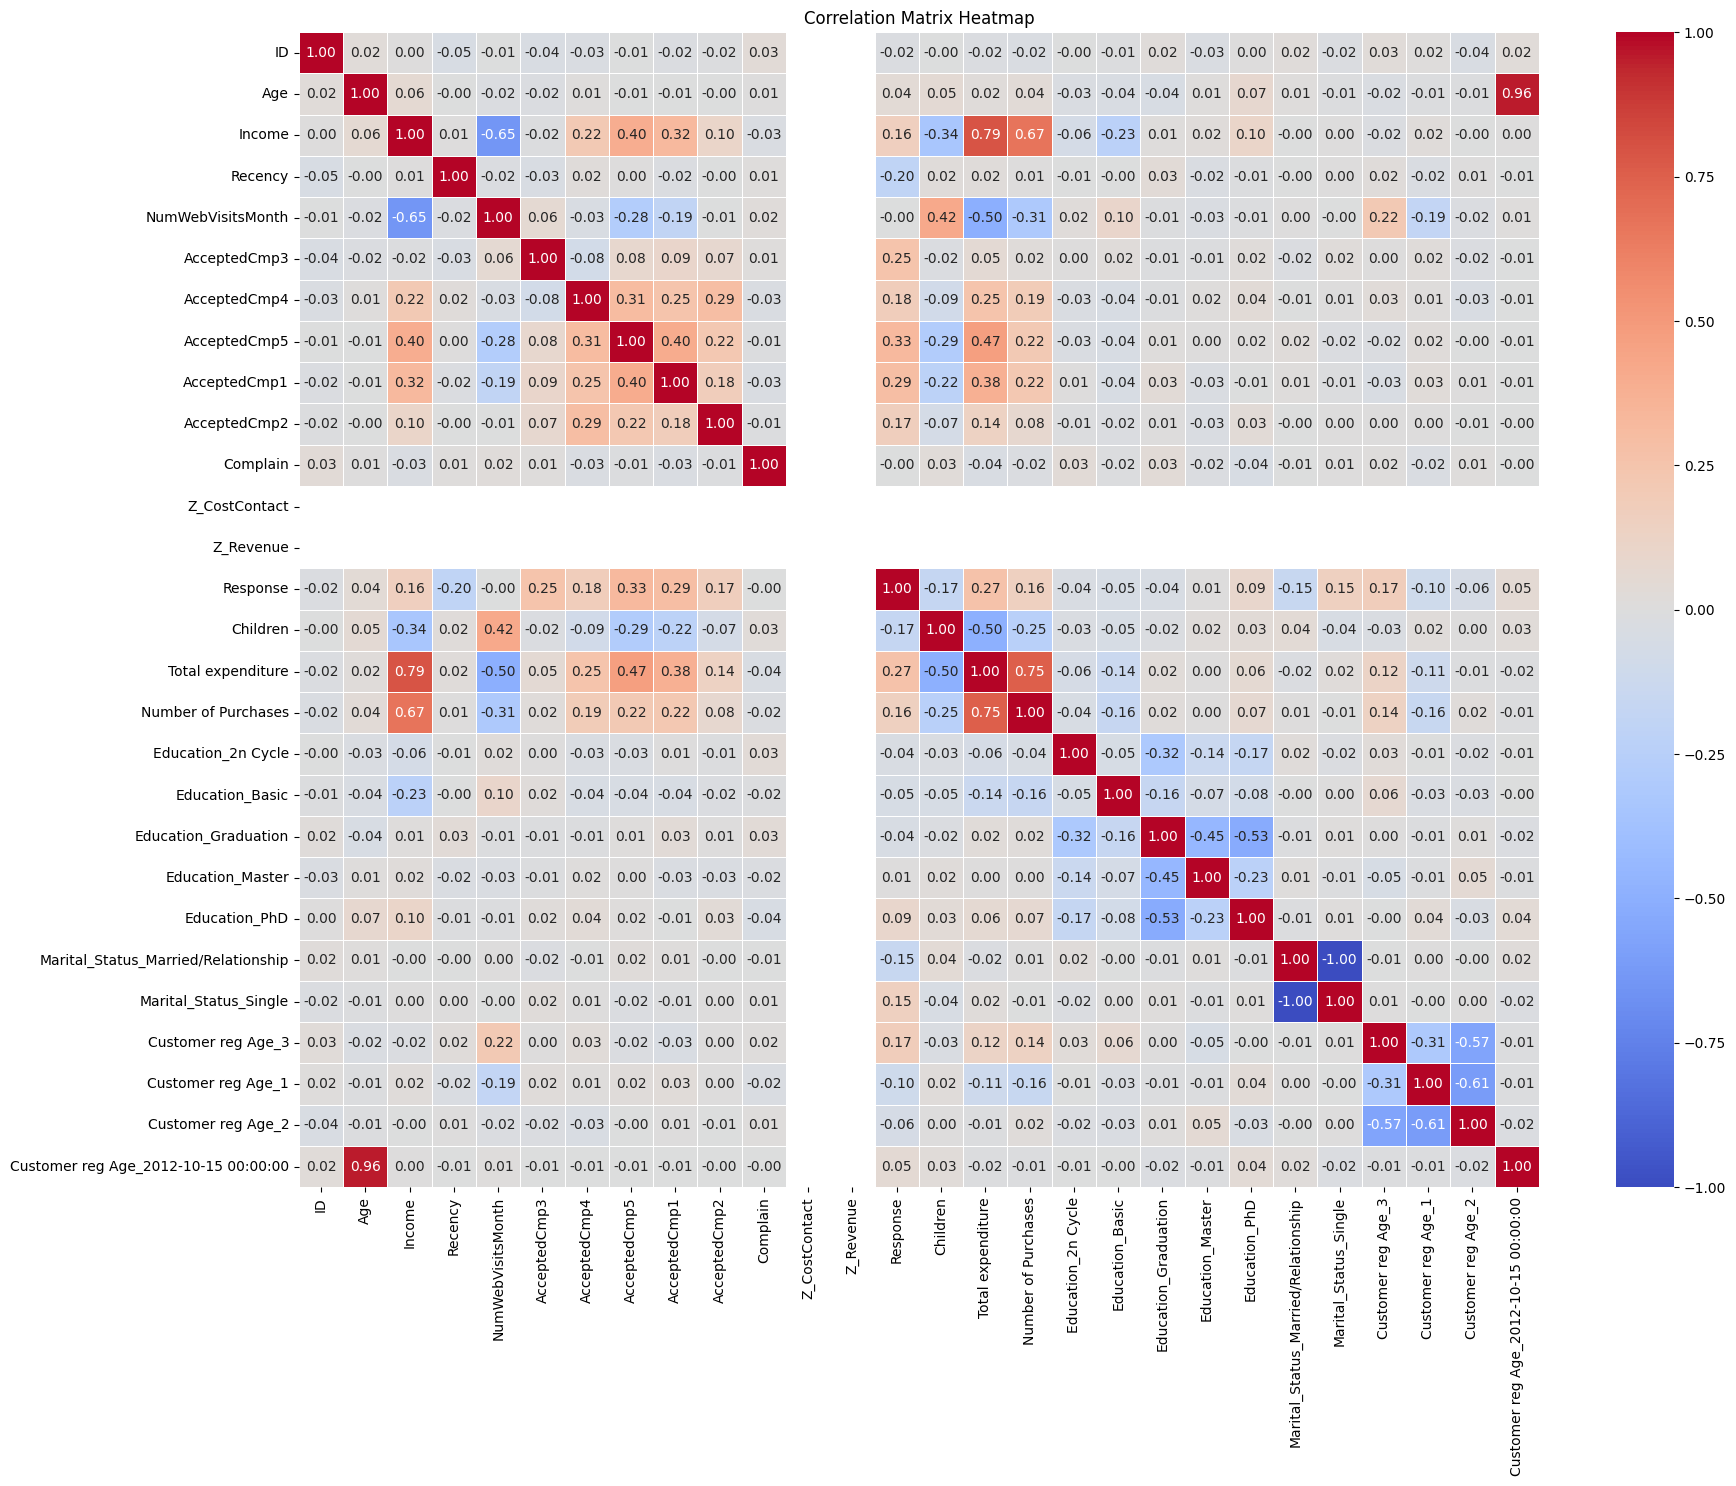

In [57]:
# Create the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

<AxesSubplot:>

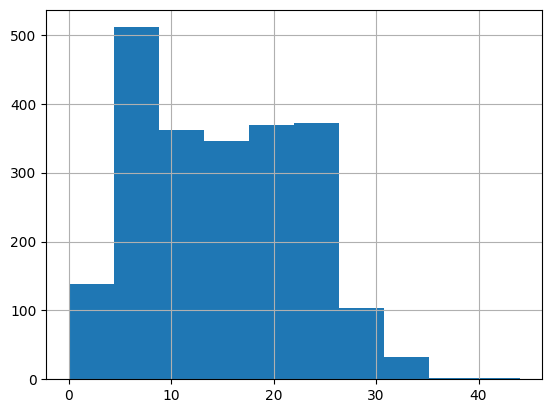

In [58]:
data['Number of Purchases'].hist()

<AxesSubplot:>

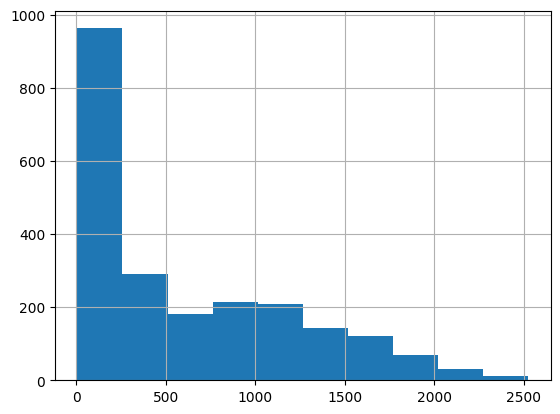

In [59]:
data['Total expenditure'].hist()

<AxesSubplot:>

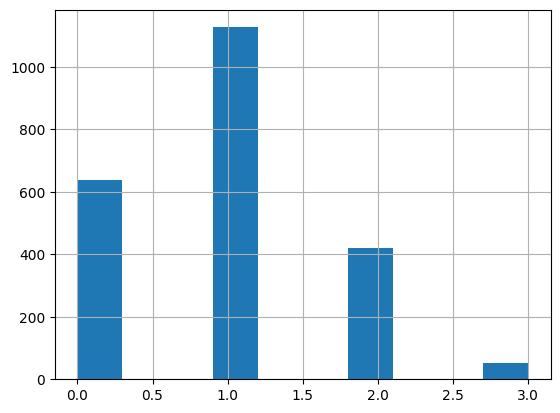

In [60]:
data['Children'].hist()

<AxesSubplot:>

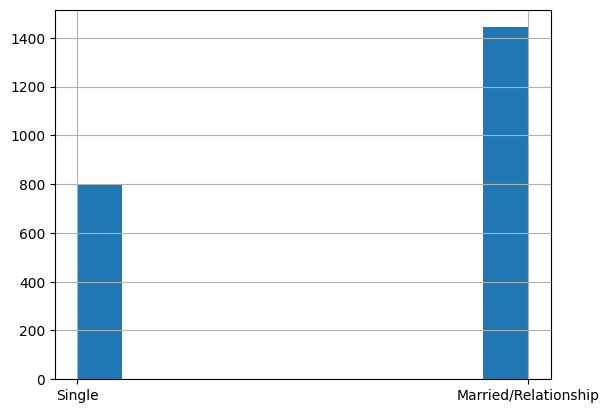

In [61]:
data['Marital_Status'].hist()

<AxesSubplot:>

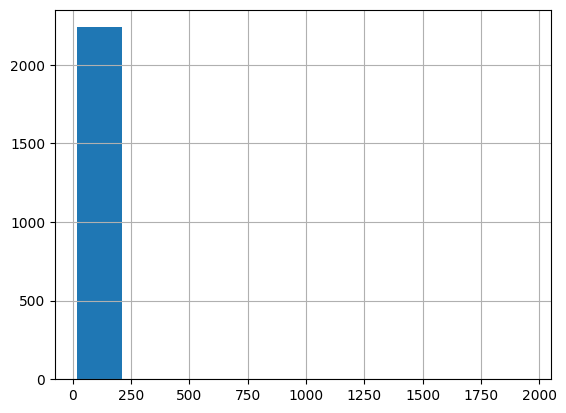

In [62]:
data['Age'].hist()

TypeError: '<=' not supported between instances of 'int' and 'Timestamp'

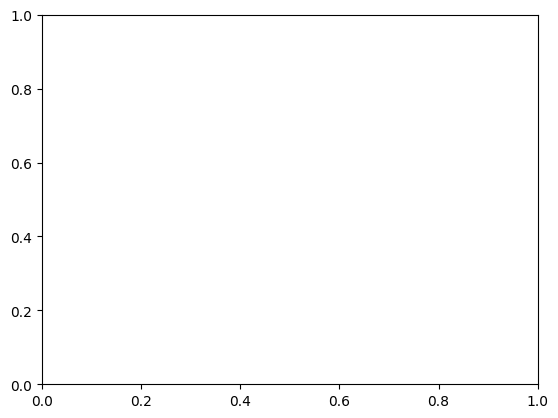

In [64]:
data['Customer reg Age'].hist()

# k-means clustering:

In [65]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Elbow method to choose number of clusters

/Users/paruljain/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/paruljain/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/paruljain/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/paruljain/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

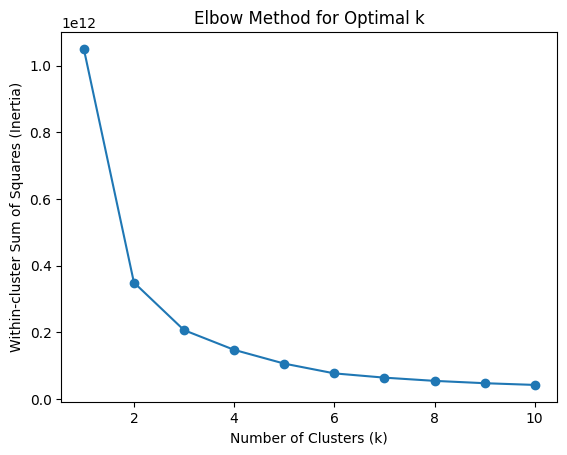

In [66]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(preprocessed_df)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()

## Silhouette Score method to find no. of clusters:

In [67]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=40)
    kmeans.fit(preprocessed_df)
    labels = kmeans.labels_
    score = silhouette_score(preprocessed_df, labels)
    silhouette_scores.append(score)

/Users/paruljain/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/paruljain/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/paruljain/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/paruljain/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

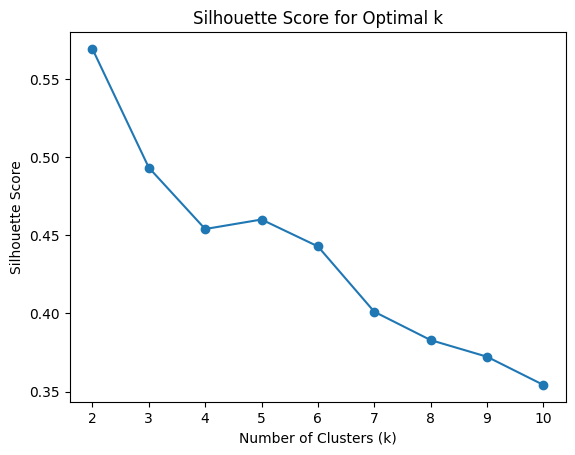

In [68]:
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

## Fitting the k-means model:

In [69]:
kmeans = KMeans(n_clusters=2)

# Fit the model to the data
kmeans.fit(preprocessed_df) 

/Users/paruljain/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [70]:
# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Get the labels of each data point
labels = kmeans.labels_

In [71]:
labels

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

# Visualization

## t-Distributed Stochastic Neighbor Embedding (t-SNE):

In [72]:
from sklearn.manifold import TSNE

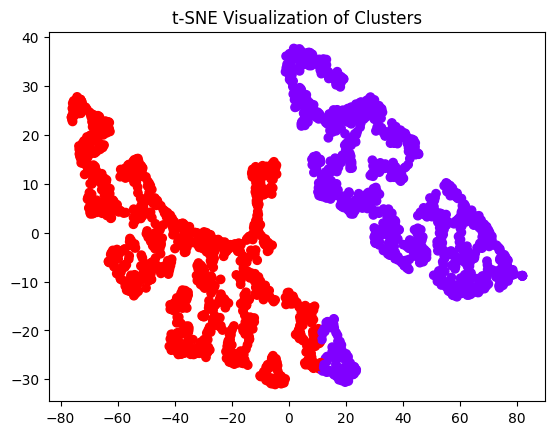

In [73]:
# Assuming you already have assigned cluster labels to each data point
cluster_labels = labels

# Perform t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(preprocessed_df)

# Create a scatter plot of the reduced data with cluster coloring
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='rainbow')
plt.title('t-SNE Visualization of Clusters')
plt.show()

## Principal Component Analysis (PCA):

In [74]:
from sklearn.decomposition import PCA

In [75]:
# Perform PCA to reduce dimensionality to 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(preprocessed_df)

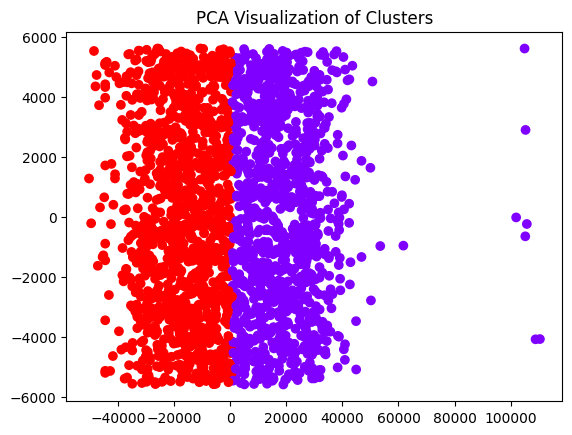

In [76]:
# Create a scatter plot of the reduced data with cluster coloring
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='rainbow')
plt.title('PCA Visualization of Clusters')
plt.show()

# Interpretation and Analyzing the Clusters:

## Cluster Profiling:

In [77]:
preprocessed_df['Cluster labels']= cluster_labels
preprocessed_df

,ID,Age,Income,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married/Relationship,Marital_Status_Single,Customer reg Age_3,Customer reg Age_1,Customer reg Age_2,Customer reg Age_2012-10-15 00:00:00,Cluster labels
0,5524,58,58138.0,58,7,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
1,2174,61,46344.0,38,5,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
2,4141,50,71613.0,26,4,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,6182,31,26646.0,26,6,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
4,5324,34,58293.0,94,5,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,69,61223.0,46,5,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
2236,4001,34,64014.0,56,7,0,0,0,1,0,...,0,0,1,1,0,0,1,0,0,0
2237,7270,59,56981.0,91,6,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,0
2238,8235,61,69245.0,8,3,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0


In [78]:
df= preprocessed_df

In [79]:
df['Income'].max()

162397.0

In [80]:
cluster_profiles = df.groupby('Cluster labels').median()  # Use .median() for a robust profile
print(cluster_profiles)

                    ID   Age   Income  Recency  NumWebVisitsMonth  \
Cluster labels                                                      
0               5521.5  48.0  69109.0     50.0                4.0   
1               5424.0  43.0  36038.0     49.0                7.0   

                AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
Cluster labels                                                           
0                        0.0           0.0           0.0           0.0   
1                        0.0           0.0           0.0           0.0   

                AcceptedCmp2  ...  Education_Basic  Education_Graduation  \
Cluster labels                ...                                          
0                        0.0  ...              0.0                   1.0   
1                        0.0  ...              0.0                   0.0   

                Education_Master  Education_PhD  \
Cluster labels                                    
0                  

## Feature Importance

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
y = df['Cluster labels']
X = df.drop('Cluster labels', axis=1)

In [83]:
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

In [84]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance)

                                 Feature  Importance
2                                 Income    0.482768
15                     Total expenditure    0.206739
16                   Number of Purchases    0.135416
4                      NumWebVisitsMonth    0.090779
14                              Children    0.019008
1                                    Age    0.013494
7                           AcceptedCmp5    0.008269
6                           AcceptedCmp4    0.007483
3                                Recency    0.007385
0                                     ID    0.006926
8                           AcceptedCmp1    0.005088
25                    Customer reg Age_1    0.002090
18                       Education_Basic    0.001637
19                  Education_Graduation    0.001515
24                    Customer reg Age_3    0.001441
21                         Education_PhD    0.001408
20                      Education_Master    0.001263
26                    Customer reg Age_2    0.

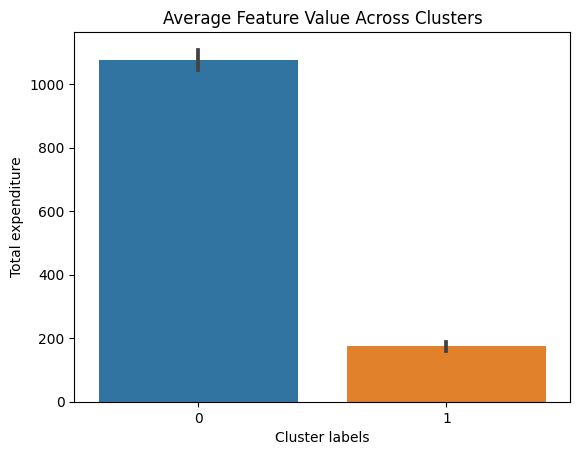

In [85]:
sns.barplot(x='Cluster labels', y='Total expenditure', data=df)
plt.title('Average Feature Value Across Clusters')
plt.show()